# Loki Retrieve
This notebook demonstrates how to run *Loki Retrieve* on the demo ST-bank dataset. It takes about 10 seconds to run this notebook on MacBook Pro.

In [1]:
import torch
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

import loki.retrieve
%matplotlib inline

We provide the embeddings generated from the OmiCLIP model.
The sample data and embeddings are stored in the directory `data/loki_retrieve/`, which can be donwloaded from [Google Drive link](https://drive.google.com/file/d/1aPK1nItsOEPxTihUAKMig-vLY-DMMIce/view?usp=sharing).

Here is a list of the files that are needed to run the retrieval on example data:
```
├── checkpoint_stbank
│   ├── demo_image_embeddings.pt
│   └── demo_text_embeddings.pt
└── demo_STbank_data
    ├── ADI-TCGA-ACCKVFLM.tif
    ├── LYM-TCGA-AFIDYMYA.tif
    ├── MUS-TCGA-AASRLCCT.tif
    ├── NORM-TCGA-AIMANAKC.tif
    ├── TUM-TCGA-YRWIKDYQ.tif
    ├── AACGATAGAAGGGCCG-1_hires.png
    ├── AATCGCGCAGAGGACT-1_hires.png
    ├── ACACAAATATTCCTAG-1_hires.png
    ├── ACCCTCCCTTGCTATT-1_hires.png
    ├── ACTGAAACGCCGTTAG-1_hires.png
    ├── AGGTAACCTCCTATTC-1_hires.png
    ├── ATTACTTACTGGGCAT-1_hires.png
    ├── CAACCTGAACCTGCCA-1_hires.png
    ├── CAGATGTTTGTCCCAA-1_hires.png
    ├── CCCTCAGATCGAGAAC-1_hires.png
    ├── CGTTGTAAACGTCAGG-1_hires.png
    ├── GCACAAACGAGGCGTG-1_hires.png
    ├── GCCGGTCGTATCTCTC-1_hires.png
    ├── GCTAGCGATAGGTCTT-1_hires.png
    ├── GCTTAATGTAACTAAC-1_hires.png
    ├── GGACACAAGTTTACAC-1_hires.png
    ├── GGGCTACTATTTCGTG-1_hires.png
    ├── GGTGTAGGTAAGTAAA-1_hires.png
    ├── TACCAAATAGCCCAGA-1_hires.png
    ├── TACCTACTCCCAGTAT-1_hires.png
    ├── TATCAGTGGCGTAGTC-1_hires.png
    ├── TATGGCCCGGCCTCGC-1_hires.png
    ├── TCAGAACCTCCACAGG-1_hires.png
    ├── TTGCCAAGCAGAACCC-1_hires.png
    ├── TTGGACCTATAACAGT-1_hires.png
    └── demo_dataset.csv                                     
```

In [2]:
data_path = './data/loki_retrieve/' 
image_dir = os.path.join(data_path, 'demo_STbank_data/')

In [3]:
dataframe = pd.read_csv(os.path.join(image_dir, 'demo_dataset.csv'), index_col=0)
dataframe

label  \
CAGATGTTTGTCCCAA-1  COL1A1 COL1A2 COL3A1 S100A6 DCN IGKC FSTL1 C3 ...   
GGGCTACTATTTCGTG-1  COL1A1 COL3A1 IGKC COL1A2 DCN FABP4 IGFBP7 LUM...   
TATCAGTGGCGTAGTC-1  COL1A1 COL3A1 COL1A2 FBN1 IGKC DCN GSN IGHG2 F...   
GCCGGTCGTATCTCTC-1  TAGLN MYL6 MYL9 TPM2 EMILIN1 RARRES2 GREM1 SEL...   
GGTGTAGGTAAGTAAA-1  MYL9 DES RPS12 TPM2 TAGLN ACTA2 TFF1 S100A6 IS...   
TACCAAATAGCCCAGA-1  TAGLN DES MYL6 ACTG2 IGFBP7 TPM2 GSN MYL9 SELE...   
AATCGCGCAGAGGACT-1  DEFA5 DEFA6 REG3A PHGR1 FABP6 REG1A RPS12 S100...   
TCAGAACCTCCACAGG-1  DEFA5 PHGR1 REG1A SPINK4 FABP1 DEFA6 MUC2 FABP...   
AACGATAGAAGGGCCG-1  DEFA5 DEFA6 RPS12 RPL37 OLFM4 PHGR1 REG1A REG3...   

                                     img_idx  
CAGATGTTTGTCCCAA-1  CAGATGTTTGTCCCAA-1_hires  
GGGCTACTATTTCGTG-1  GGGCTACTATTTCGTG-1_hires  
TATCAGTGGCGTAGTC-1  TATCAGTGGCGTAGTC-1_hires  
GCCGGTCGTATCTCTC-1  GCCGGTCGTATCTCTC-1_hires  
GGTGTAGGTAAGTAAA-1  GGTGTAGGTAAGTAAA-1_hires  
TACCAAATAGCCCAGA-1  TACCAAATAGCCCAGA-1_hires  
AATCGCGCAGAGGACT-1  AATCGCGCAGAGGACT-1_hires  
TCAGAACCTCCACAGG-1  TCAGAACCTCCACAGG-1_hires  
AACGATAGAAGGGCCG-1  AACGATAGAAGGGCCG-1_hires

## Loki Retrieve on image-to-ST retrieval
Use Loki Retrieve to retrieve ST from image.

In [4]:
image_list = ['ADI-TCGA-ACCKVFLM.tif',
              'MUS-TCGA-AASRLCCT.tif',
              'NORM-TCGA-AIMANAKC.tif'
]
all_query_image_embeddings = torch.load(os.path.join(data_path, 'checkpoint_stbank', 'demo_image_embeddings.pt'))
all_text_embeddings = torch.load(os.path.join(data_path, 'checkpoint_stbank', 'demo_text_embeddings.pt'))

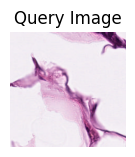

Retrieved ST with paired images:
COL1A1 COL1A2 COL3A1 S100A6 DCN IGKC FSTL1 C3 FBN1 IGFBP5 ITM2B IGHG2 CFD CMTM6 IGFBP7 CXCL14 HSPA8 LRP1 SERF2 TUBB6 IGLC1 DHRS3 C1QB TM2D1 PTPRC CRIM1 DBI HNRNPA3 COPG1 HNRNPDL SELENOP CD14 SPARC ADAMTS2 TNXB TTYH3 CTSB FABP4 GSN DDX21 INS LUM IGHA1 APOE MYL9 TIMP1 TSC22D3 RERE PLA2G2A LAPTM5
COL1A1 COL3A1 IGKC COL1A2 DCN FABP4 IGFBP7 LUM HBA2 C3 C1QB HNRNPA2B1 CD36 CTSD IGFBP6 IGFBP4 TSC22D3 MAT2A NISCH AQP1 CTSB MYC CCL21 SAR1A LYVE1 TCIRG1 THY1 OAF POSTN EPSTI1 ITM2B RNASE1 RTRAF MAX FOS IGHG2 CNN2 COL6A1 LZTR1 BGN HP1BP3 ECE1 HSPG2 C1QA PITHD1 IFI6 SERBP1 MCL1 S100A6 FCGR3A
COL1A1 COL3A1 COL1A2 FBN1 IGKC DCN GSN IGHG2 FSTL1 TNXB COL6A1 SPARC IFITM2 RHOB IGFBP5 FBLN2 CLEC3B IGFBP7 PI16 CCN2 IGFBP6 CFD C3 TSC22D3 HSPG2 S100A6 ATRAID TGFBR2 EGR1 ARPC1B PLEC LYVE1 C1R SERPINF1 CMPK1 JUN CCN1 CNN3 CSF1 GUK1 EFEMP1 GCG FN1 CTDSP1 ARPC4 BOC WDR1 SPARCL1 C7 HSPA1A


/var/folders/f1/0m_1r9dx73dff178jp2t41900000gp/T/ipykernel_85778/2979384241.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = dataframe[dataframe['img_idx']==match]['label'][0]


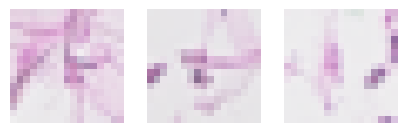

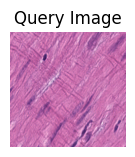

Retrieved ST with paired images:
TAGLN MYL6 MYL9 TPM2 EMILIN1 RARRES2 GREM1 SELENOM S100A6 ACTG2 DES A2M CSRP1 NBL1 LIMS2 RPS13 MALAT1 ACTA2 NUPR1 SPARCL1 TMEM176A MTRNR2L8 FAU EFEMP2 C1S SERF2 TPM1 MTRNR2L1 MIF COL6A2 DDOST SELENOF RPL5 LAMTOR5 OST4 FN1 RAMP1 APEH MTRNR2L12 LPP ABCE1 RPL37 PITX1 DAAM2 COL12A1 BRI3 LAMTOR4 GOLM1 EDF1 IFITM2
TAGLN DES MYL6 ACTG2 IGFBP7 TPM2 GSN MYL9 SELENOM RPL15 FLNC TMEM176A ACTA2 GREM1 NUPR1 NBL1 HSPG2 S100A6 EMILIN1 EPAS1 COX5B COL3A1 LAMB2 LPP ADH5 UQCRQ UBE2B DCTN4 NHP2 HSPA1A MAN1A1 CTGF MICALL2 AGR2 RCC1L COL1A2 CALD1 ZYX PLAT TGFBR1 FBXW5 PTGDS CD151 MUC6 KDELC2 MSMB ATP5MD TSPAN9 A2M KCTD12
MYL9 DES RPS12 TPM2 TAGLN ACTA2 TFF1 S100A6 ISY1 IGFBP7 LYZ SERF2 NBL1 IGFBP5 TNS1 P2RY14 PALLD NCOA7 RSPO3 RAMP3 TMEM176A RPL10 TLN1 GSN ENG CWC15 MYL6 ITM2B CRIP2 RPL36 CNN1 KLF2 PPP1R14A SELENOM TFF2 COL18A1 SDF4 VWA1 PARK7 DFFA RCC2 SYF2 RSRP1 FAM110D C1orf122 SERBP1 GNG5 SH3GLB1 SORT1 S100A3


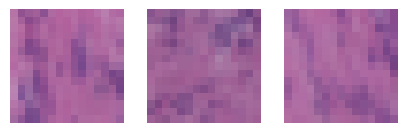

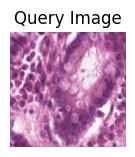

Retrieved ST with paired images:
DEFA5 DEFA6 REG3A PHGR1 FABP6 REG1A RPS12 S100A6 PLA2G2A RPL37 RPL30 SPINK4 LYZ KRT8 OLFM4 RPL10 FAU TFF3 FABP1 AGR2 MUC2 RPL36 RPL9 IGHA1 MT1G FCGBP PIGR PRSS2 PRAP1 CLCA1 RPL15 RPS13 RPS24 MYL6 SERF2 KRT19 LGALS4 NDUFS5 RPL5 ATP1A1 IGKC ATP5ME RPS4X PYY SNHG25 MAP2K2 GUCA2A EPCAM MZT2B TMA7
DEFA5 DEFA6 RPS12 RPL37 OLFM4 PHGR1 REG1A REG3A RPL36 IGKC IGHA1 FABP6 RPS13 RPL9 RPL10 RPL30 RPS24 RPS4X FAU PLA2G2A RPL5 LYZ RPL26 KRT8 RPL22 EPCAM TOMM7 SPINK4 ATP5F1E CD52 S100A6 SPINK1 IGHM SNHG25 AGR2 RPS20 MYL6 DBI RPL15 ATP5ME SNHG8 RBM3 TUBA1B SERF2 ELOB KRT19 LGALS4 PIGR CXCR4 TMA7
DEFA5 PHGR1 REG1A SPINK4 FABP1 DEFA6 MUC2 FABP6 TFF3 RPL37 S100A6 IGHA1 FCGBP RPL10 PIGR AGR2 C15orf48 RPL36 RPL9 RPS13 KRT8 OLFM4 SERF2 ATP1A1 ATP5ME RPS4X RPL30 FAU MYL6 TSPAN8 MT1G RPL22 RPS12 COX5A SNHG25 IGLC2 TSPAN1 MGST3 UQCRQ EDF1 ADIRF ITM2B ANPEP KRT19 UQCR11 IGKC COX5B HSPE1 RPL15 DSP


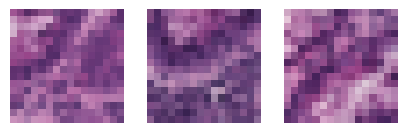

In [10]:
i=0
for query_image in image_list:
    image_path = os.path.join(image_dir, query_image)
    image = Image.open(image_path)
    image_embeddings = all_query_image_embeddings[i]
    plt.figure(figsize=(1.5,1.5), dpi=100)
    plt.imshow(image)
    plt.title("Query Image")
    plt.axis("off")
    plt.show()

    matches = loki.retrieve.retrieve_st_by_image(image_embeddings, all_text_embeddings, dataframe)

    print("Retrieved ST with paired images:")
    _, axes = plt.subplots(1, 3, figsize=(5, 2), dpi=100)
    for match, ax in zip(matches, axes.flatten()):
        image = cv2.imread(f"{image_dir}{match}"+".png")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = dataframe[dataframe['img_idx']==match]['label'][0]
        print(label)
        ax.imshow(image)
        ax.axis("off")
    
    i=i+1